# AFT - Image Stack Example Notebook

This notebook illustrates an example of measuring alignment in a stack of images to extract changes in organization over time

### Import packages

In [11]:
import skimage.io as io                 # For reading in images
import AFT_tools as AFT                 # AFT (Alignment by Fourier Transform) functions
import numpy as np                      # For math
import matplotlib.pyplot as plt         # For plotting
import os                               # For saving to disk

%matplotlib notebook
%matplotlib widget

### Read in images and define parameters

<div style="background-color:#abd9e9; border-radius: 5px; padding: 10pt"><strong>User to-do:</strong> in the next cell, update path to image stack to be tested and path to folder where to save output</div>

In [2]:
path_to_image = '../../../data/AFT_test_data/images/fig8/actin_live.tiff'
path_output =  '../../../data/AFT_test_data/output/'

In [3]:
# read image
imstack = io.imread(path_to_image)

<div style="background-color:#abd9e9; border-radius: 5px; padding: 10pt"><strong>User to-do:</strong> select parameters for the analysis in the next cell</div>

In [4]:
# AFT parameters

#### required parameters ####
window_size = 33
overlap = 0.5
neighborhood_radius = 2

#### optional parameters ####
intensity_threshold = 125
# eccentricity_threshold = 0.4
# im_mask = io.imread('mask').astype('bool')


### Calculate the local orientation for each image

In [6]:
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(imstack, window_size, overlap, save_path=path_output,
                                                              intensity_thresh=intensity_threshold, plot_overlay=False, 
                                                              plot_angles=False, plot_eccentricity=False, save_figures=False)

### Calculate the order parameter for each image

In [7]:
im_order_parameter = AFT.calculate_order_parameter(im_theta, neighborhood_radius)

### Plot the results over time

Images in this series were taken one minute apart

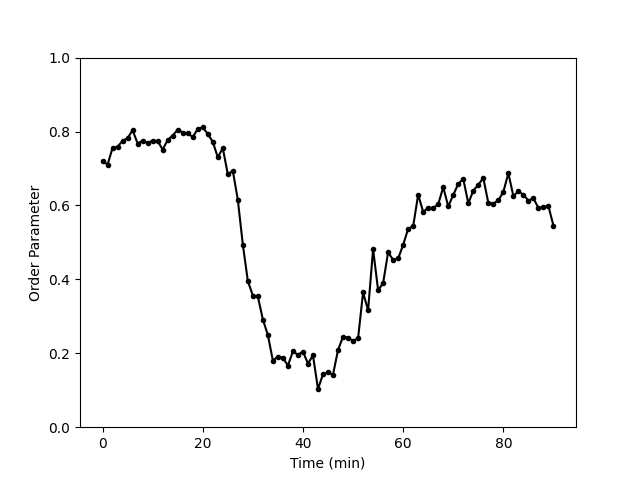

In [8]:
# create a list of time points
time = np.arange(0,imstack.shape[0])

plt.figure()
plt.plot(time, im_order_parameter, '-k.')
plt.ylabel('Order Parameter')
plt.xlabel('Time (min)')
plt.ylim(0,1)
plt.tight_layout
plt.show()

### Save the data as a .csv file

In [10]:
# make an array with the time and order parameter data
data = np.column_stack((time, im_order_parameter))

# save the order parameter data
np.savetxt(path_output+'order_parameter_values.csv', data, delimiter=',')